## Training on LFW Dataset with Pairwise Contrastive Loss
-------------------------

In [1]:
import os
import torchsummary
import matplotlib.pyplot as plt
import torch
import numpy as np

os.chdir('..')
print(os.getcwd()) # Should be .\ContrastiveLearning
from Code.dataloaders import LFWContrastiveDataset
from Code.trainers import Trainer
from Code.models import ContrastiveModel
from Code.losses import ContrastiveLoss



THRESHOLD = 0.5
METRIC = recall_score
METRIC_NAME = "RECALL" + "_@_" + str(THRESHOLD)
MODEL_WEIGHTS = "./Outputs/Weights/128_100_3_True_2_LEVIR_TRAIN_LEVIR_VAL_ReducedProjector4_511.pth"
DEVICE = 'cuda'



# Reproduciblity
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

F:\Research\ContrastiveLearning


## Create Dataloader and Inspect Data
---------------------

In [2]:
lfw = LFWContrastiveDataset(resize_to=(105,105))

In [3]:
outdict = lfw.__getitem__(4)
[outdict[k].shape for k in outdict.keys()]

[torch.Size([2, 3, 105, 105]),
 torch.Size([2, 3, 105, 105]),
 torch.Size([2, 1])]

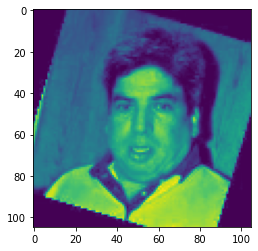

In [4]:
idx = 0
plt.imshow(outdict["x1"][idx,0,...])

tensor([1.])


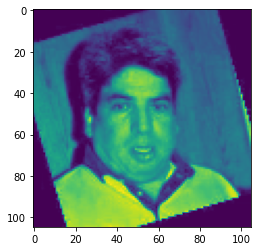

In [5]:
plt.imshow(outdict["x2"][idx,0,...]); print(outdict["label"][idx])

In [6]:
subset_indices = list(range(N)) # Limit examples for testing 
subset_sampler = torch.utils.data.SubsetRandomSampler(subset_indices)
lfw_dl = torch.utils.data.DataLoader(lfw, 
                                     batch_size=None,
                                     sampler = subset_sampler)

## Model
------------

In [7]:
model = ContrastiveModel(IN_CHANNELS, EMB_SIZE).to(DEVICE)
torchsummary.summary(model, input_size = (3, 105, 105), device=DEVICE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 96, 96]          19,264
              ReLU-2           [-1, 64, 96, 96]               0
         MaxPool2d-3           [-1, 64, 48, 48]               0
            Conv2d-4          [-1, 128, 42, 42]         401,536
              ReLU-5          [-1, 128, 42, 42]               0
         MaxPool2d-6          [-1, 128, 21, 21]               0
            Conv2d-7          [-1, 128, 18, 18]         262,272
         MaxPool2d-8            [-1, 128, 9, 9]               0
              ReLU-9            [-1, 128, 9, 9]               0
           Conv2d-10            [-1, 256, 6, 6]         524,544
             ReLU-11            [-1, 256, 6, 6]               0
           Linear-12                 [-1, 4096]      37,752,832
Total params: 38,960,448
Trainable params: 38,960,448
Non-trainable params: 0
-------------------------

## Training
-------------------------

In [8]:
CL = ContrastiveLoss()

t = Trainer(model = model, 
            dataloader = lfw_dl, 
            lr=LR, 
            loss_function= CL)

In [9]:
t.train(EPOCHS, print_every=2)

----- Epoch: 0 -----
loss: 2.2519680163264275
----- Epoch: 2 -----
loss: 1.1605017124861479
----- Epoch: 4 -----
loss: 0.9403246060013771
----- Epoch: 6 -----
loss: 0.9260261516273022
----- Epoch: 8 -----
loss: 0.8580646821856499
----- Epoch: 10 -----
loss: 0.8019205810129643
----- Epoch: 12 -----
loss: 0.8346385648846626
----- Epoch: 14 -----
loss: 0.7504526254534721
----- Epoch: 16 -----
loss: 0.7015265645086766
----- Epoch: 18 -----
loss: 0.6617258518189192


## Saving Model
-------------------------

In [13]:
name = str(EPOCHS) + "_" + str(EMB_SIZE) + "_" + str(LR) + ".pth"
fname = r'./Outputs/Weights/' + name
torch.save(model.state_dict(), fname); print(fname)

./Outputs/Weights/20_4096_0.0005.pth
